<a href="https://colab.research.google.com/github/Anav010/AI-ML-algo-implementation/blob/main/ML_AI_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 0.16997965789997335


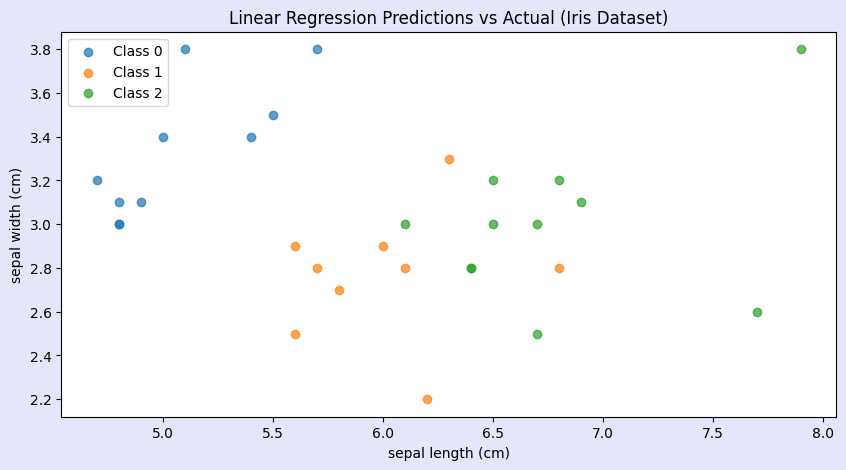

In [ ]:
#LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

iris = load_iris()
X = iris.data[:, :2]
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


plt.figure(figsize=(10,5),facecolor='lavender')


for i in range(len(np.unique(y))):
    plt.scatter(X_test[y_test == i][:, 0], X_test[y_test == i][:, 1], label=f'Class {i}', alpha=0.7)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Linear Regression Predictions vs Actual (Iris Dataset)")
plt.legend()
plt.show()

In [ ]:
#A* ALGORITHM
grid = [[0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0]]

heuristic = [[9, 8, 7, 6, 5, 4],
             [8, 7, 6, 5, 4, 3],
             [7, 6, 5, 4, 3, 2],
             [6, 5, 4, 3, 2, 1],
             [5, 4, 3, 2, 1, 0]]

init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ],
         [ 0, -1],
         [ 1, 0 ],
         [ 0, 1 ]]
delta_name = ['^', '<', 'v', '>']
def search(grid,init,goal,cost,heuristic):
    closed = [[0 for col in range(len(grid[0]))] for row in range(len(grid))]
    closed[init[0]][init[1]] = 1

    expand = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]
    action = [[-1 for col in range(len(grid[0]))] for row in range(len(grid))]

    x = init[0]
    y = init[1]
    g = 0
    f = g + heuristic[x][y]

    open = [[f, g, x, y]]

    found = False
    resign = False
    count = 0

    while not found and not resign:
        if len(open) == 0:
            resign = True
            return "Fail"
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            f = next[0]
            g = next[1]
            x = next[2]
            y = next[3]

            expand[x][y] = count
            count += 1

            if x == goal[0] and y == goal[1]:
                found = True
                break
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            f = g2 + heuristic[x2][y2]
                            open.append([f, g2, x2, y2])
                            closed[x2][y2] = 1

    return expand

result = search(grid,init,goal,cost,heuristic)
for el in result:
	print (el)

[0, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1]
[2, -1, -1, -1, -1, -1]
[3, -1, 8, 9, 10, 11]
[4, 5, 6, 7, -1, 12]


[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]
[0]


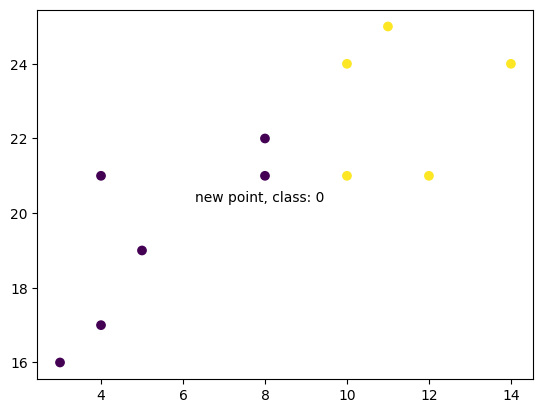

[1]


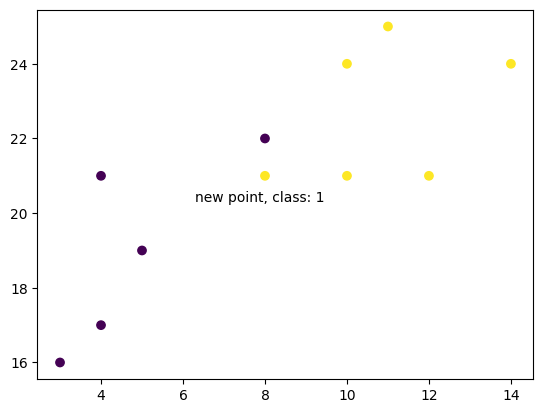

In [ ]:
#Implementation of Nearest Neighbour Algorithm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

data = list(zip(x, y))
print(data)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)

new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [ ]:
#Naïve Baye’s Algorithm
#IRIS
%pip install scikit-learn
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict the labels of test data
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9722222222222222


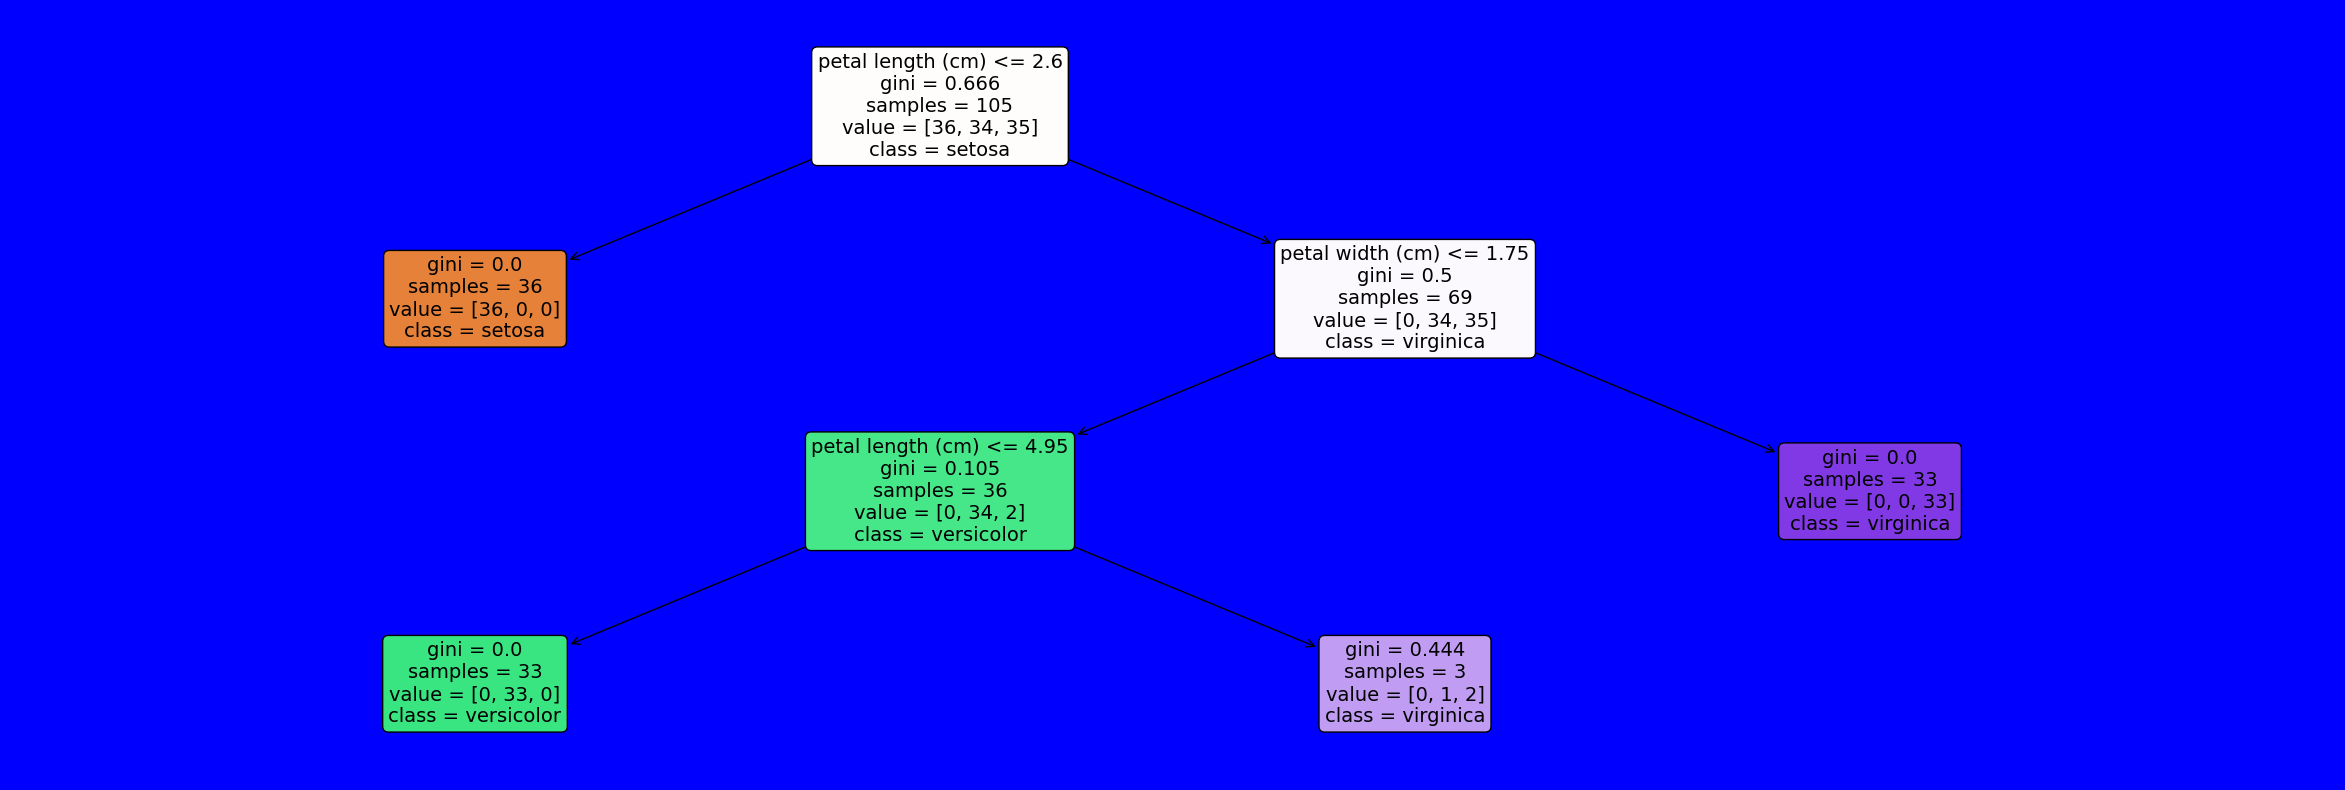

In [ ]:
#Decision Tree Algorithm
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

# Loading the dataset
iris = load_iris()

#converting the data to a pandas dataframe
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

#creating a separate column for the target variable of iris dataset
data['Species'] = iris.target

#replacing the categories of target variable with the actual names of the species
target = np.unique(iris.target)
target_n = np.unique(iris.target_names)
target_dict = dict(zip(target, target_n))
data['Species'] = data['Species'].replace(target_dict)

# Separating the independent dependent variables of the dataset
x = data.drop(columns = "Species")
y = data["Species"]
names_features = x.columns
target_labels = y.unique()

# Splitting the dataset into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 93)
# Importing the Decision Tree classifier class from sklearn
from sklearn.tree import DecisionTreeClassifier
# Creating an instance of the classifier class
dtc = DecisionTreeClassifier(max_depth = 3, random_state = 93)
# Fitting the training dataset to the model
dtc.fit(x_train, y_train)
# Plotting the Decision Tree
plt.figure(figsize = (30, 10), facecolor = 'b')
Tree = tree.plot_tree(dtc, feature_names = names_features, class_names = target_labels, rounded = True, filled = True, fontsize = 14)
plt.show()
y_pred = dtc.predict(x_test)

plt.show()


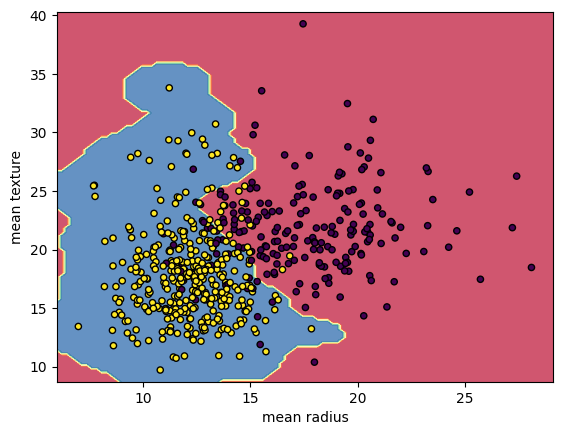

In [ ]:
#Support Vector Machine Algorithm
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
		svm,
		X,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
		xlabel=cancer.feature_names[0],
		ylabel=cancer.feature_names[1],
	)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
			c=y,
			s=20, edgecolors="k")
plt.show()


Dataset loaded successfully


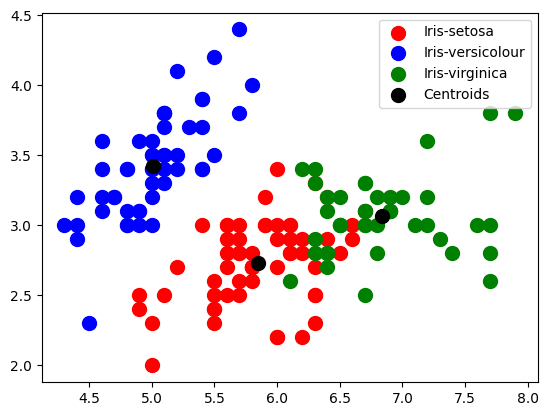

In [ ]:
#K-Mean Algorithm
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans

iris = datasets.load_iris()
print("Dataset loaded successfully")

Data = pd.DataFrame(iris.data, columns = iris.feature_names)
# Settin the data
x=Data.iloc[:,0:3].values

#Applying Kmeans classifier
kmeans = KMeans(n_clusters=3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)
kmeans.cluster_centers_

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()


In [ ]:
#Random Forest Algorithm
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
#A* Algorithm
from copy import deepcopy
import numpy as np
import time

def bestsolution(state):
    bestsol = np.array([], int).reshape(-1, 9)
    count = len(state) - 1
    while count != -1:
        bestsol = np.insert(bestsol, 0, state[count]['puzzle'], 0)
        count = (state[count]['parent'])
    return bestsol.reshape(-1, 3, 3)


# checks for the uniqueness of the iteration(it).
def all(checkarray):
    set=[]
    for it in set:
        for checkarray in it:
            return 1
        else:
            return 0


# number of misplaced tiles
def misplaced_tiles(puzzle,goal):
    mscost = np.sum(puzzle != goal) - 1
    return mscost if mscost > 0 else 0


def coordinates(puzzle):
    pos = np.array(range(9))
    for p, q in enumerate(puzzle):
        pos[q] = p
    return pos


# start of 8 puzzle evaluvation, using Misplaced tiles heuristics
def evaluvate_misplaced(puzzle, goal):
    steps = np.array([('up', [0, 1, 2], -3),('down', [6, 7, 8],  3),('left', [0, 3, 6], -1),('right', [2, 5, 8],  1)],
                dtype =  [('move',  str, 1),('position', list),('head', int)])

    dtstate = [('puzzle',  list),('parent', int),('gn',  int),('hn',  int)]

    costg = coordinates(goal)
    # initializing the parent, gn and hn, where hn is misplaced_tiles  function call
    parent = -1
    gn = 0
    hn = misplaced_tiles(coordinates(puzzle), costg)
    state = np.array([(puzzle, parent, gn, hn)], dtstate)

   #priority queues with position as keys and fn as value.
    dtpriority = [('position', int),('fn', int)]

    priority = np.array([(0, hn)], dtpriority)

    while 1:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])
        position, fn = priority[0]
        # sort priority queue using merge sort,the first element is picked for exploring.
        priority = np.delete(priority, 0, 0)
        puzzle, parent, gn, hn = state[position]
        puzzle = np.array(puzzle)

        blank = int(np.where(puzzle == 0)[0])

        gn = gn + 1
        c = 1
        start_time = time.time()
        for s in steps:
            c = c + 1
            if blank not in s['position']:
                openstates = deepcopy(puzzle)
                openstates[blank], openstates[blank + s['head']] = openstates[blank + s['head']], openstates[blank]

                if ~(np.all(list(state['puzzle']) == openstates, 1)).any():
                    end_time = time.time()
                    if (( end_time - start_time ) > 2):
                        print(" The 8 puzzle is unsolvable \n")
                        break

                    hn = misplaced_tiles(coordinates(openstates), costg)
                    # generate and add new state in the list
                    q = np.array([(openstates, position, gn, hn)], dtstate)
                    state = np.append(state, q, 0)
                    # f(n) is the sum of cost to reach node
                    fn = gn + hn

                    q = np.array([(len(state) - 1, fn)], dtpriority)
                    priority = np.append(priority, q, 0)

                    if np.array_equal(openstates, goal):
                        print(' The 8 puzzle is solvable \n')
                        return state, len(priority)

    return state, len(priority)


# initial state
puzzle = []

puzzle.append(2)
puzzle.append(8)
puzzle.append(3)
puzzle.append(1)
puzzle.append(6)
puzzle.append(4)
puzzle.append(7)
puzzle.append(0)
puzzle.append(5)

#goal state
goal = []

goal.append(1)
goal.append(2)
goal.append(3)
goal.append(8)
goal.append(0)
goal.append(4)
goal.append(7)
goal.append(6)
goal.append(5)


state, visited = evaluvate_misplaced(puzzle, goal)
bestpath = bestsolution(state)
print(str(bestpath).replace('[', ' ').replace(']', ''))
totalmoves = len(bestpath) - 1
print('\nSteps to reach goal:',totalmoves)
visit = len(state) - visited
print('Total nodes visited: ',visit, "\n")


 The 8 puzzle is solvable 

   2 8 3
   1 6 4
   7 0 5

   2 8 3
   1 0 4
   7 6 5

   2 0 3
   1 8 4
   7 6 5

   0 2 3
   1 8 4
   7 6 5

   1 2 3
   0 8 4
   7 6 5

   1 2 3
   8 0 4
   7 6 5

Steps to reach goal: 5
Total nodes visited:  6 



<ipython-input-14-a6f8b2cfdb60>:65: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  blank = int(np.where(puzzle == 0)[0])


In [ ]:
#AO* Algorithm
# Cost to find the AND and OR path
def Cost(H, condition, weight = 1):
	cost = {}
	if 'AND' in condition:
		AND_nodes = condition['AND']
		Path_A = ' AND '.join(AND_nodes)
		PathA = sum(H[node]+weight for node in AND_nodes)
		cost[Path_A] = PathA

	if 'OR' in condition:
		OR_nodes = condition['OR']
		Path_B =' OR '.join(OR_nodes)
		PathB = min(H[node]+weight for node in OR_nodes)
		cost[Path_B] = PathB
	return cost

# Update the cost
def update_cost(H, Conditions, weight=1):
	Main_nodes = list(Conditions.keys())
	Main_nodes.reverse()
	least_cost= {}
	for key in Main_nodes:
		condition = Conditions[key]
		print(key,':', Conditions[key],'>>>', Cost(H, condition, weight))
		c = Cost(H, condition, weight)
		H[key] = min(c.values())
		least_cost[key] = Cost(H, condition, weight)
	return least_cost

# Print the shortest path
def shortest_path(Start,Updated_cost, H):
	Path = Start
	if Start in Updated_cost.keys():
		Min_cost = min(Updated_cost[Start].values())
		key = list(Updated_cost[Start].keys())
		values = list(Updated_cost[Start].values())
		Index = values.index(Min_cost)

		# FIND MINIMIMUM PATH KEY
		Next = key[Index].split()
		# ADD TO PATH FOR OR PATH
		if len(Next) == 1:

			Start =Next[0]
			Path += '<--' +shortest_path(Start, Updated_cost, H)
		# ADD TO PATH FOR AND PATH
		else:
			Path +='<--('+key[Index]+') '

			Start = Next[0]
			Path += '[' +shortest_path(Start, Updated_cost, H) + ' + '

			Start = Next[-1]
			Path += shortest_path(Start, Updated_cost, H) + ']'

	return Path



H = {'A': -1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I':0, 'J':0}

Conditions = {
'A': {'OR': ['B'], 'AND': ['C', 'D']},
'B': {'OR': ['E', 'F']},
'C': {'OR': ['G'], 'AND': ['H', 'I']},
'D': {'OR': ['J']}
}
# weight
weight = 1
# Updated cost
print('Updated Cost :')
Updated_cost = update_cost(H, Conditions, weight=1)
print('*'*75)
print('Shortest Path :\n',shortest_path('A', Updated_cost,H))

Updated Cost :
D : {'OR': ['J']} >>> {'J': 1}
C : {'OR': ['G'], 'AND': ['H', 'I']} >>> {'H AND I': 2, 'G': 4}
B : {'OR': ['E', 'F']} >>> {'E OR F': 8}
A : {'OR': ['B'], 'AND': ['C', 'D']} >>> {'C AND D': 5, 'B': 9}
***************************************************************************
Shortest Path :
 A<--(C AND D) [C<--(H AND I) [H + I] + D<--J]


In [ ]:
#Hill Climbing Algorithm
import random
import numpy as np
import networkx as nx

#coordinate of the points/cities
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7], [15,20], [10,9], [12,12]])

#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)
    return solution


#calculate the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

#generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)

    #assume that the first neighbor in the list is the best neighbor
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path


def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)

    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix,current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    return current_path, current_solution
final_solution = hill_climbing(coordinate)
print("The solution is \n", final_solution[1])

The solution is 
 [6, 9, 10, 8, 1, 2, 4, 3, 7, 0, 5]
